# Computational Drug Discovery

Building a real-life Data Science Project. The focus of the project is to build a machine learning model using ChEMBL bioactivity data.

Credit: [*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

## ChEMBL Database

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a manually curated database of bioactive molecules with drug-like properties. It brings together chemical, bioactivity and genomic data to aid the translation of genomic information into effective new drugs

## Installing ChEMBL web service package

In [1]:
# Installing Chembl Webservice
! pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.4 MB/s eta 0:00:00


In [6]:
# Importing libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

## Import data for a specific Target Protein

In [10]:
target = new_client.target
target_query = target.search("acetylcholinesterase") # returns a dictionary (target_query)
targets = pd.DataFrame.from_dict(target_query) # transform the dictionary into a pandas dataframe
targets.head()

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
1,[],Homo sapiens,Acetylcholinesterase,16.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Torpedo californica,Acetylcholinesterase,16.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
3,[],Mus musculus,Acetylcholinesterase,16.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
4,[],Rattus norvegicus,Acetylcholinesterase,16.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116


## Select target: Human Acetlycholinesterase (CHEMBL220)

In [11]:
selected_target = targets[targets["target_chembl_id"]== "CHEMBL220"]
selected_target


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
1,[],Homo sapiens,Acetylcholinesterase,16.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606


In [12]:
activity = new_client.activity
res = activity.filter(target_chembl_id = "CHEMBL220").filter(standard_type = "IC50")
df = pd.DataFrame.from_dict(res)
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9415 entries, 0 to 9414
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                1522 non-null   object 
 1   activity_comment           1341 non-null   object 
 2   activity_id                9415 non-null   int64  
 3   activity_properties        9415 non-null   object 
 4   assay_chembl_id            9415 non-null   object 
 5   assay_description          9415 non-null   object 
 6   assay_type                 9415 non-null   object 
 7   assay_variant_accession    0 non-null      object 
 8   assay_variant_mutation     0 non-null      object 
 9   bao_endpoint               9415 non-null   object 
 10  bao_format                 9415 non-null   object 
 11  bao_label                  9415 non-null   object 
 12  canonical_smiles           9379 non-null   object 
 13  data_validity_comment      717 non-null    objec

In [14]:
# only use unique standard types
df.standard_type.unique()

array(['IC50'], dtype=object)

In [15]:
df.to_csv("bioactivity_data.csv", index= False)

In [16]:
df2 = pd.read_csv("bioactivity_data.csv")
df2.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
1,NaN,NaN,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.10
2,NaN,NaN,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,50.00
3,NaN,NaN,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.30
4,NaN,NaN,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.80


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9415 entries, 0 to 9414
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                1522 non-null   object 
 1   activity_comment           1340 non-null   object 
 2   activity_id                9415 non-null   int64  
 3   activity_properties        9415 non-null   object 
 4   assay_chembl_id            9415 non-null   object 
 5   assay_description          9415 non-null   object 
 6   assay_type                 9415 non-null   object 
 7   assay_variant_accession    0 non-null      float64
 8   assay_variant_mutation     0 non-null      float64
 9   bao_endpoint               9415 non-null   object 
 10  bao_format                 9415 non-null   object 
 11  bao_label                  9415 non-null   object 
 12  canonical_smiles           9379 non-null   object 
 13  data_validity_comment      717 non-null    objec

In [18]:
# adress missing values
df2 = df2[df2["standard_value"].notna()]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8130 entries, 0 to 9414
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                1521 non-null   object 
 1   activity_comment           63 non-null     object 
 2   activity_id                8130 non-null   int64  
 3   activity_properties        8130 non-null   object 
 4   assay_chembl_id            8130 non-null   object 
 5   assay_description          8130 non-null   object 
 6   assay_type                 8130 non-null   object 
 7   assay_variant_accession    0 non-null      float64
 8   assay_variant_mutation     0 non-null      float64
 9   bao_endpoint               8130 non-null   object 
 10  bao_format                 8130 non-null   object 
 11  bao_label                  8130 non-null   object 
 12  canonical_smiles           8128 non-null   object 
 13  data_validity_comment      702 non-null    object 
 1

## Mapping the bioactivity of the compounds to active, inactive or intermediate

The bioactivity in df["standard_value"] is described in the IC50 unit.

The IC50 unit (half-maximal inhibitory concentration) is the concentration of a compound required to inhibit a bilogical process by 50%. A biological process can be an enzyme activity, cell growth etc. The lower the IC50, the higher the potency.  

For this example, three categories will be introduced:

- Active: Compounds with < 1000 nM
- Inactive: Compounds with > 10,000 nM
- Intermediate: Compounds with values between 1000 nM and 10,000 nM

In [19]:
# transform the object type into numeric
df2["standard_value"] = pd.to_numeric(df2["standard_value"], errors="coerce")

# use a function and the map function to categorize the activity
def categorize_activity(i):
    if i >= 10000:
        return "inactive"
    elif i <= 1000:
        return "active"
    else:
        return "intermediate"

df2["bioactivity_class"] = df2["standard_value"].map(categorize_activity)

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8130 entries, 0 to 9414
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                1521 non-null   object 
 1   activity_comment           63 non-null     object 
 2   activity_id                8130 non-null   int64  
 3   activity_properties        8130 non-null   object 
 4   assay_chembl_id            8130 non-null   object 
 5   assay_description          8130 non-null   object 
 6   assay_type                 8130 non-null   object 
 7   assay_variant_accession    0 non-null      float64
 8   assay_variant_mutation     0 non-null      float64
 9   bao_endpoint               8130 non-null   object 
 10  bao_format                 8130 non-null   object 
 11  bao_label                  8130 non-null   object 
 12  canonical_smiles           8128 non-null   object 
 13  data_validity_comment      702 non-null    object 
 1

In [21]:
columns_to_use = ["molecule_chembl_id", "canonical_smiles", "standard_value", "bioactivity_class"]
df3 = df2[columns_to_use]
df3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8130 entries, 0 to 9414
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  8130 non-null   object 
 1   canonical_smiles    8128 non-null   object 
 2   standard_value      8130 non-null   float64
 3   bioactivity_class   8130 non-null   object 
dtypes: float64(1), object(3)
memory usage: 317.6+ KB


In [22]:
df3.to_csv("bioactivity_preprocessed_data.csv", index= False)

In [23]:
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active


# EDA

In [24]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-03-16 18:16:00--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   104MB/s    in 0.8s    

2025-03-16 18:16:01 (104 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=

## Calculate Lipinski descriptors

In order to assess the drug-likeness of a compound Christopher Lipinski introduced the Lipinski's Rule.

A compound is considered drug-like if it meets at least 3 out of 4 criteria.

The 4 criteria are:
- Molecular weight < 500 Dalton
- Octanol-water partition coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

--> Lipinski's rule of is essential in drug discovery because it helps to predict whether a compound will have good Absorption, Distribution, Metabolism, and Excretion (ADME) properties, which determine its effectivness as an oral drug.



In [25]:
!conda install -c conda-forge rdkit

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

In [26]:
pip install rdkit

     |████████████████████████████████| 29.5 MB 1.2 MB/s 


In [27]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [34]:
df = pd.read_csv("/content/bioactivity_preprocessed_data.csv")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8130 entries, 0 to 8129
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  8130 non-null   object 
 1   canonical_smiles    8128 non-null   object 
 2   standard_value      8130 non-null   float64
 3   bioactivity_class   8130 non-null   object 
dtypes: float64(1), object(3)
memory usage: 254.2+ KB


In [38]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

def lipinski(smiles):
    """Calculate Lipinski's molecular descriptors for a list of SMILES."""

    data = []  # Use a list instead of np.vstack() for efficiency

    for elem in smiles:
        if isinstance(elem, str):  # Ensure it's a valid SMILES string
            mol = Chem.MolFromSmiles(elem)
        else:
            mol = None

        if mol:  # Ensure the molecule is valid
            desc_MolWt = Descriptors.MolWt(mol)  # Molecular Weight
            desc_MolLogP = Descriptors.MolLogP(mol)  # LogP (lipophilicity)
            desc_NumHDonors = Descriptors.NumHDonors(mol)  # Hydrogen Bond Donors
            desc_NumHAcceptors = Descriptors.NumHAcceptors(mol)  # Hydrogen Bond Acceptors
            data.append([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])
        else:
            data.append([None, None, None, None])  # Placeholder for invalid molecules

    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data, columns=columnNames)

    return descriptors

In [40]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0


In [42]:
df_lipinski.describe()

,MW,LogP,NumHDonors,NumHAcceptors
count,8128.000000,8128.000000,8128.000000,8128.000000
mean,405.775901,3.976122,1.091535,4.377707
std,130.705357,2.331847,1.107037,1.970698
min,61.040000,-6.615100,0.000000,0.000000
25%,319.408000,2.695800,0.000000,3.000000
50%,390.395000,4.029100,1.000000,4.000000
75%,479.251500,5.277875,2.000000,6.000000
max,1235.463000,13.506800,13.000000,22.000000


In [43]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8130 entries, 0 to 8129
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  8130 non-null   object 
 1   canonical_smiles    8128 non-null   object 
 2   standard_value      8130 non-null   float64
 3   bioactivity_class   8130 non-null   object 
 4   MW                  8128 non-null   float64
 5   LogP                8128 non-null   float64
 6   NumHDonors          8128 non-null   float64
 7   NumHAcceptors       8128 non-null   float64
dtypes: float64(5), object(3)
memory usage: 508.3+ KB


## IC50 to pIC50

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

- Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
- Take the molar value and apply -log10
- Delete the standard_value column and create a new pIC50 column


In [44]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

In [45]:
df_combined["standard_value"].describe()

,standard_value
count,8.130000e+03
mean,9.621809e+04
std,9.839719e+05
min,0.000000e+00
25%,1.000000e+02
50%,1.504500e+03
75%,1.240000e+04
max,5.000000e+07


In [46]:
-np.log10( (10**-9)* 100000000 )

1.0

In [47]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [48]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis= 1)

    return x

In [49]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,800.0
...,...,...,...,...,...,...,...,...
8125,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,301.298,2.0110,4.0,6.0,46000.0
8126,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,105.093,-1.6094,3.0,3.0,38310.0
8127,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,intermediate,401.474,2.9571,3.0,5.0,1710.0
8128,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,inactive,387.447,2.6149,4.0,5.0,10000.0


In [50]:
df_final = pIC50(df_norm)
df_final

<ipython-input-44-14e0ebee44d0>:10: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
8125,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,301.298,2.0110,4.0,6.0,4.337242
8126,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,105.093,-1.6094,3.0,3.0,4.416688
8127,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,intermediate,401.474,2.9571,3.0,5.0,5.767004
8128,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,inactive,387.447,2.6149,4.0,5.0,5.000000


In [51]:
df_final["pIC50"].describe()

,pIC50
count,8130.000000
mean,inf
std,NaN
min,1.301030
25%,4.906578
50%,5.822610
75%,7.000000
max,inf


## Removing "intermediate" bioactivity class


In [52]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910


# Chemical Space Analysis using Lipinski descriptors

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

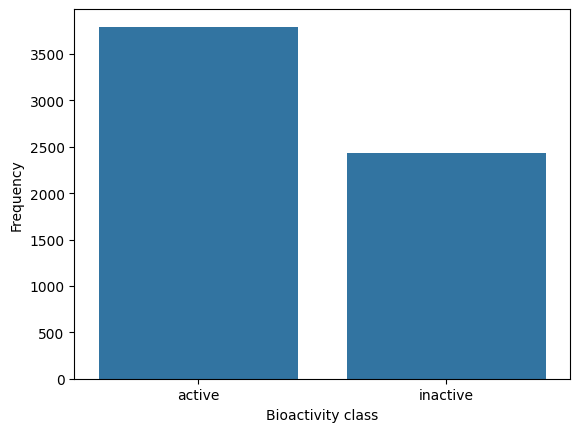

<Figure size 640x480 with 0 Axes>

In [54]:
# understand the class distribution (bioactivity level distribution)
sns.countplot(x= "bioactivity_class", data= df_2class)
plt.xlabel("Bioactivity class")
plt.ylabel("Frequency")
plt.show()
plt.savefig("plot_bioactivity_class_distribution.pdf")

In [55]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


ValueError: Can only output finite numbers in PDF

Error in callback <function flush_figures at 0x7f87db8a3240> (for post_execute):


KeyboardInterrupt: 

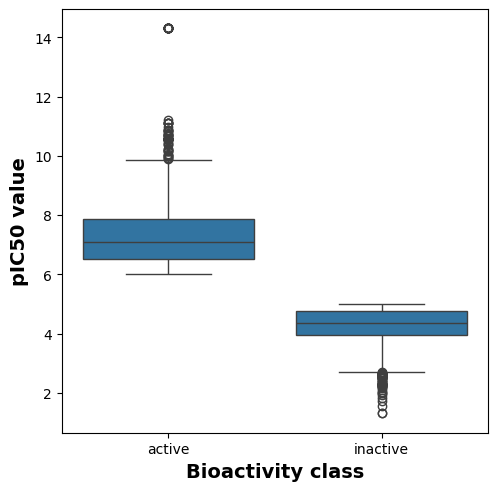

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [57]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results


In [58]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,9211832.0,0.0,0.05,Different distribution (reject H0)


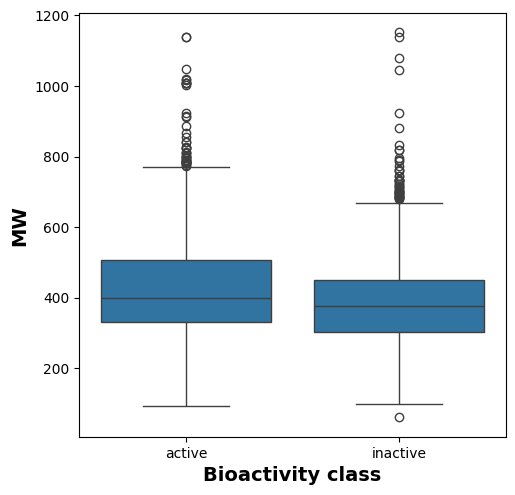

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [60]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,NaN,NaN,0.05,Different distribution (reject H0)


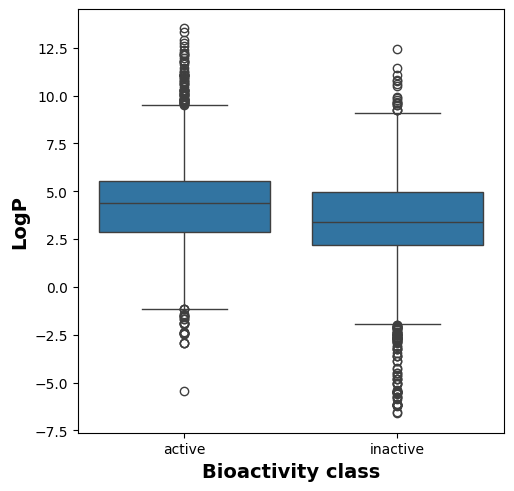

In [61]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [62]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,NaN,NaN,0.05,Different distribution (reject H0)


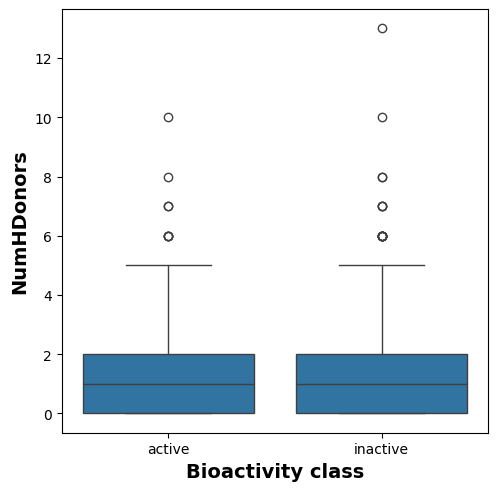

In [63]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [64]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,NaN,NaN,0.05,Different distribution (reject H0)


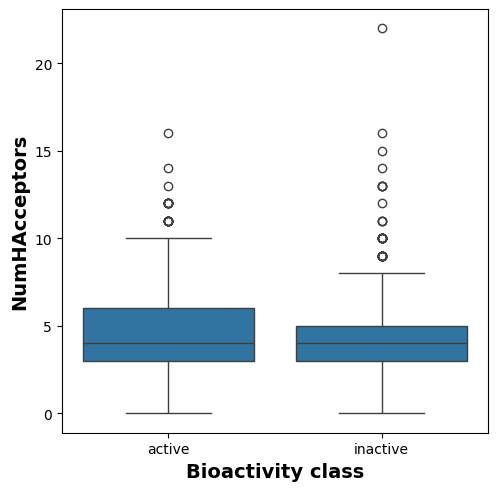

In [65]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [66]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,NaN,NaN,0.05,Different distribution (reject H0)


In [67]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_MW.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 36%)
  adding: plot_bioactivity_class_distribution.pdf (deflated 49%)
  adding: plot_MW_vs_LogP.pdf (deflated 27%)
  adding: plot_NumHAcceptors.pdf (deflated 39%)
  adding: mannwhitneyu_pIC50.csv (deflated 8%)
  adding: mannwhitneyu_MW.csv (deflated 6%)
  adding: mannwhitneyu_LogP.csv (deflated 6%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: bioactivity_preprocessed_data.csv (deflated 83%)
  adding: bioactivity_data.csv (deflated 91%)
  adding: plot_ic50.pdf (deflated 35%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)


## PaDEL-Descriptor

In [68]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2025-03-16 18:31:50--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2025-03-16 18:31:51--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2025-03-16 18:31:51 (214 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2025-03-16 18:31:52--  https://github

In [69]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [70]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv

--2025-03-16 18:32:40--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 655414 (640K) [text/plain]
Saving to: ‘acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv’

acetylcholinesteras 100%[===================>] 640.05K  --.-KB/s    in 0.04s   

2025-03-16 18:32:40 (16.6 MB/s) - ‘acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv’ saved [655414/655414]



In [71]:
df3 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [72]:
df3.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910


In [73]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [74]:
! cat molecule.smi | head -5

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478


In [75]:
! cat molecule.smi | wc -l


4695


In [76]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

In [77]:
df3_X = pd.read_csv('descriptors_output.csv')

In [79]:
df3_X.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df3_Y = df3['pIC50']
df3_Y

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
4690,5.612610
4691,5.595166
4692,5.419075
4693,5.460924


In [82]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.612610
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.595166
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.419075
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.460924


In [83]:
dataset3.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)